<a href="https://colab.research.google.com/github/Amruthakap3/AML/blob/main/letter_recognization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Letter Recognition - using voting and ensemble classifiers. 

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense, Dropout, Flatten
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from matplotlib import pyplot
from numpy import where
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy as np

In [60]:
url = 'https://raw.githubusercontent.com/bforoura/AML/master/letters.csv'
df = pd.read_csv(url)
df.head(5)
df_temp = df

In [3]:
df.describe()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [4]:
print(df.isna().sum())

x-box    0
y-box    0
width    0
high     0
onpix    0
x-bar    0
y-bar    0
x2bar    0
y2bar    0
xybar    0
x2ybr    0
xy2br    0
x-ege    0
xegvy    0
y-ege    0
yegvx    0
class    0
dtype: int64


In [5]:
# correlations between various factors and the outcome .
df.corr()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
x-box,1.000000,0.757793,0.851514,0.672764,0.619097,-0.032595,0.045545,0.014306,0.052086,0.148056,0.035464,-0.046333,0.489155,0.098180,0.273504,-0.105147
y-box,0.757793,1.000000,0.671912,0.823207,0.555067,0.045690,-0.040925,-0.025019,0.096478,0.159954,-0.054648,-0.007568,0.274431,-0.001336,0.230883,-0.042741
width,0.851514,0.671912,1.000000,0.660215,0.765716,0.061959,0.024832,-0.098611,0.057074,0.115018,0.011694,-0.045009,0.557251,0.045658,0.260285,-0.118273
high,0.672764,0.823207,0.660215,1.000000,0.644366,0.042844,-0.020072,0.082383,0.059032,0.012458,-0.011991,0.026386,0.265243,0.025359,0.297545,-0.018853
onpix,0.619097,0.555067,0.765716,0.644366,1.000000,0.139159,-0.028822,-0.011985,-0.065557,-0.069776,-0.072941,-0.038858,0.627507,0.017649,0.492653,-0.062969
x-bar,-0.032595,0.045690,0.061959,0.042844,0.139159,1.000000,-0.356580,-0.053306,-0.122851,0.085963,-0.341957,-0.032115,0.144325,-0.253339,0.127056,0.248816
y-bar,0.045545,-0.040925,0.024832,-0.020072,-0.028822,-0.356580,1.000000,-0.118625,-0.049658,0.178318,0.600397,-0.271649,-0.036722,0.555060,-0.078008,-0.207900
x2bar,0.014306,-0.025019,-0.098611,0.082383,-0.011985,-0.053306,-0.118625,1.000000,-0.188431,-0.317780,0.042545,0.082020,0.142132,-0.084820,0.006546,0.182902
y2bar,0.052086,0.096478,0.057074,0.059032,-0.065557,-0.122851,-0.049658,-0.188431,1.000000,0.132000,-0.060116,0.119048,-0.384018,-0.052545,0.277540,-0.061335
xybar,0.148056,0.159954,0.115018,0.012458,-0.069776,0.085963,0.178318,-0.317780,0.132000,1.000000,0.057988,-0.106759,-0.175676,0.029419,-0.087019,-0.114223


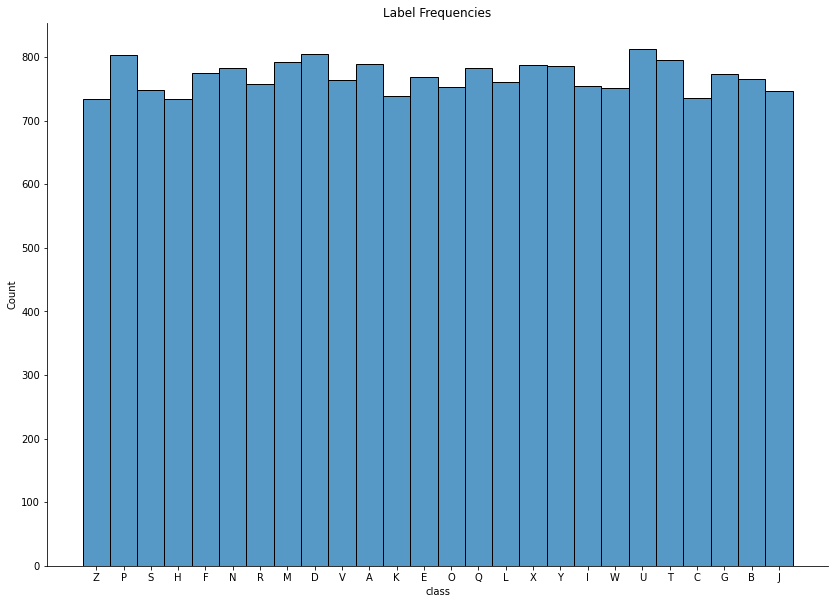

In [63]:
#Plot label frequencies to verify that the letters A-Z are well-represented in the dataset.

sns.displot(df_temp, x="class", height=8.27, aspect=11.7/8.27).set(title='Label Frequencies')

In [7]:
## all numeric values needs to be scaled
#Split the data into training and testing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler


labelencoder = LabelEncoder()
df['class'] = labelencoder.fit_transform(df['class'])

X = df[df.columns[0:16]]
y = df['class']

#scaler = StandardScaler()
scaler =  MinMaxScaler()
scaled_X = scaler.fit_transform(X)

# set aside the normalized data for training and testing
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, random_state=22)

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier


# To measure performance
from sklearn import metrics

#SVC
svc_clf = SVC(kernel='rbf', degree=3, probability=True,tol=0.001)

# Defining the stump
dt_clf = DecisionTreeClassifier(max_depth = 10, splitter = "best", max_features = "sqrt")

# Create Random Forest 
bagging_clf = BaggingClassifier(base_estimator = dt_clf, n_estimators = 1000,
                             bootstrap = True)

randomForest_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Create Random ExtraTrees 
extra_tree_forest_clf = ExtraTreesClassifier(n_estimators = 5,
                                        criterion ='entropy', max_features = 2)

#SGD
sgd_clf = SGDClassifier(loss="log", penalty="l2")
  

# Training classifiers
svc_clf.fit(X_train, np.ravel(y_train))
dt_clf.fit(X_train, np.ravel(y_train))
bagging_clf.fit(X_train, np.ravel(y_train))
randomForest_clf.fit(X_train, np.ravel(y_train))
extra_tree_forest_clf.fit(X_train, np.ravel(y_train))
sgd_clf.fit(X_train, np.ravel(y_train))

# Making predictions
y_pred_svc = svc_clf.predict(X_test)
y_pred_tree = dt_clf.predict(X_test)
y_pred_bagging = bagging_clf.predict(X_test)
y_pred_randomForest = randomForest_clf.predict(X_test)
y_pred_extraTree = extra_tree_forest_clf.predict(X_test)
y_pred_sgd = sgd_clf.predict(X_test)

# Determine performance
svc_accuracy = metrics.accuracy_score(y_test, y_pred_svc)
dt_accuracy = metrics.accuracy_score(y_test, y_pred_tree)
bagging_accuracy = metrics.accuracy_score(y_test, y_pred_bagging)
randomForest_accurecy = metrics.accuracy_score(y_test, y_pred_randomForest)
extraTree_accurecy = metrics.accuracy_score(y_test, y_pred_extraTree)
sgd_accurecy = metrics.accuracy_score(y_test, y_pred_sgd)

# Print message to user
print(f"The accuracy of the SVC is {svc_accuracy*100:.1f} %")
print(f"The accuracy of the distionTree is {dt_accuracy*100:.1f} %")
print(f"The accuracy of the bagging is {bagging_accuracy*100:.1f} %")
print(f"The accuracy of the Random Forest is {randomForest_accurecy*100:.1f} %")
print(f"The accuracy of the Extra tree is {extraTree_accurecy*100:.1f} %")
print(f"The accuracy of the SGD  is {sgd_accurecy*100:.1f} %")

The accuracy of the SVC is 93.1 %
The accuracy of the distionTree is 57.1 %
The accuracy of the bagging is 87.6 %
The accuracy of the Random Forest is 96.3 %
The accuracy of the Extra tree is 88.8 %
The accuracy of the SGD  is 68.9 %


In [9]:
from sklearn.model_selection import KFold

def cross_validate_model (classifier_model, name, X, y):
    kfold = KFold(n_splits=3, shuffle=True, random_state=10)

    # perform model cross validation on the shuffled folds
    results = cross_val_score(classifier_model, X, y, cv=kfold)

    # return the mean score for all folds
    score = results.mean()
    print("The mean score for all folds for {} is {}".format(name, score))
    return score

svc_cross_validate_score = cross_validate_model(svc_clf, 'SVC', scaled_X, y)   
dt_validate_score = cross_validate_model(dt_clf, 'Disition tree', scaled_X, y)   
bagging_cross_validate_score = cross_validate_model(bagging_clf, 'Bagging', scaled_X, y)   
randomForest_cross_validate_score = cross_validate_model(randomForest_clf, 'Random Forest', scaled_X, y)    
extraTree_cross_validate_score = cross_validate_model(extra_tree_forest_clf, 'Extra tree', scaled_X, y)  
sgd_cross_validate_score = cross_validate_model(sgd_clf, 'SGD', scaled_X, y)  

The mean score for all folds for SVC is 0.9194501046024807
The mean score for all folds for Disition tree is 0.6492493332129072
The mean score for all folds for Bagging is 0.8678499168350914
The mean score for all folds for Random Forest is 0.958599917288864
The mean score for all folds for Extra tree is 0.872649841855342
The mean score for all folds for SGD is 0.6735997133536662


In [64]:
#Voting classifier

from sklearn.ensemble import VotingClassifier
named_estimators = [
    ("svc_clf", svc_clf),
   # ("dt_clf", dt_clf),
    ("bagging_clf", bagging_clf),
    ("randomForest_clf", randomForest_clf),
    ("extra_tree_forest_clf", extra_tree_forest_clf)
   # ("sgd_clf", sgd_clf)
]

voting_clf = VotingClassifier(named_estimators)

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('svc_clf', SVC(probability=True)),
                             ('bagging_clf',
                              BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=10,
                                                                                      max_features='sqrt'),
                                                n_estimators=1000)),
                             ('randomForest_clf',
                              RandomForestClassifier(random_state=42)),
                             ('extra_tree_forest_clf',
                              ExtraTreesClassifier(criterion='entropy',
                                                   max_features=2,
                                                   n_estimators=5))])

In [65]:
 voting_clf.score(X_test, y_test)

0.94675

In [66]:
[estimator.score(X_test, y_test) for estimator in voting_clf.estimators_]

[0.93125, 0.876, 0.963, 0.89175]

In [67]:
voting_clf.voting = "soft"
voting_clf.score(X_test, y_test)
 

0.9615

In [68]:
voting_soft__cross_validate_score = cross_validate_model(voting_clf, 'Voting clasifier(soft)', X, y)  

The mean score for all folds for Voting clasifier(soft) is 0.9515000247587381


In [69]:
voting_clf.voting = "hard"
voting_clf.score(X_test, y_test)

0.94675

In [70]:
voting_hard_cross_validate_score = cross_validate_model(voting_clf, 'Voting clasifier(soft)', X, y)  

The mean score for all folds for Voting clasifier(soft) is 0.938650029694735


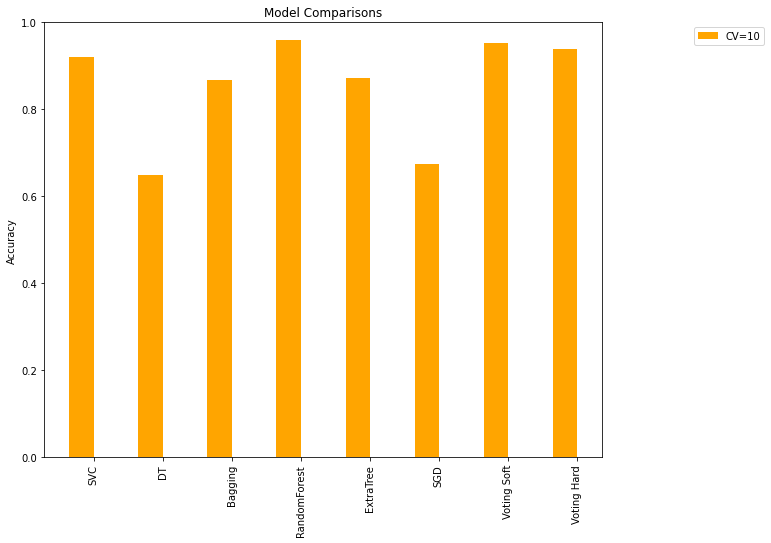

In [71]:
  

labels = ['SVC', 'DT', 'Bagging', 'RandomForest', 'ExtraTree', 'SGD', 'Voting Soft', 'Voting Hard']
training_scores = [svc_cross_validate_score,
                   dt_validate_score,
                   bagging_cross_validate_score,
                   randomForest_cross_validate_score,
                   extraTree_cross_validate_score,
                   sgd_cross_validate_score,
                   voting_soft__cross_validate_score,
                   voting_hard_cross_validate_score
                   ]

x = np.arange(len(labels))  # the label locations


width = 0.35  # the width of the bars

fig, ax = plt.subplots()
#rects1 = ax.bar(x - width/10, training_scores, width, label='CV=10', color='orange')

rects1 = ax.bar(x - width/2, training_scores, width, label='CV=10', color='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_xticks(x)
ax.set_ylim(0,1)
ax.set_xticklabels(labels, rotation='vertical')
ax.legend(bbox_to_anchor = (1.3, 1.0), loc='upper right')

plt.title('Model Comparisons')
plt.show()


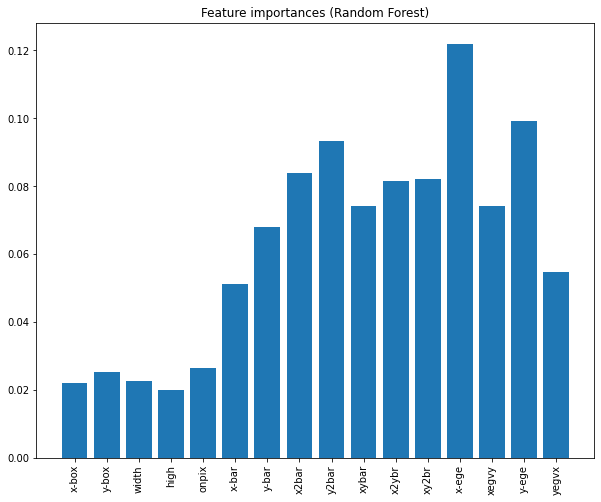

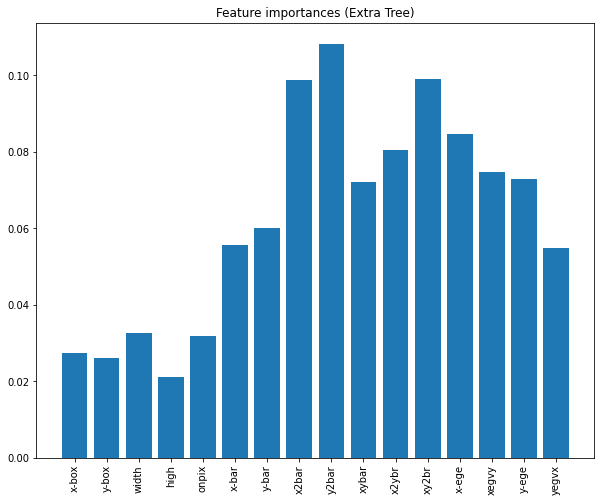

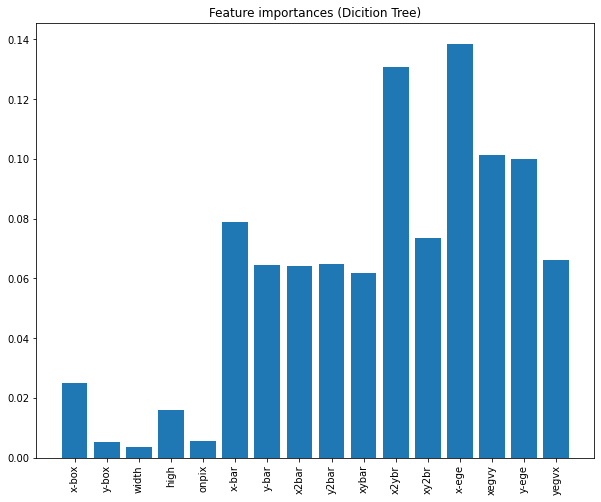

In [73]:
# get feature importances from the model
importance = randomForest_clf.feature_importances_

feature_names = ['x-box',	'y-box',	'width',	'high',	'onpix',	'x-bar',	'y-bar',	'x2bar',	'y2bar',	'xybar',	'x2ybr',	'xy2br',	'x-ege',	'xegvy',	'y-ege',	'yegvx']
 
# plot feature importances
pyplot.bar([x for x in range(len(importance))], importance)
plt.title('Feature importances (Random Forest)')
plt.xticks(range(scaled_X.shape[1]), feature_names, rotation='vertical')
plt.rcParams["figure.figsize"] = (10,8)
pyplot.show()

# plot feature importances
importance = extra_tree_forest_clf.feature_importances_
pyplot.bar([x for x in range(len(importance))], importance)
plt.title('Feature importances (Extra Tree)')
plt.xticks(range(scaled_X.shape[1]), feature_names, rotation='vertical')
plt.rcParams["figure.figsize"] = (10,8)
pyplot.show()

# plot feature importances
importance = dt_clf.feature_importances_
pyplot.bar([x for x in range(len(importance))], importance)
plt.title('Feature importances (Dicition Tree)')
plt.xticks(range(scaled_X.shape[1]), feature_names, rotation='vertical')
plt.rcParams["figure.figsize"] = (10,8)
pyplot.show()

In [19]:
from sklearn.decomposition import PCA
pca = PCA(0.99)
X_train_pca = pca.fit_transform(scaled_X)
pca.n_components_

15

In [20]:
#Train Kmeans
from sklearn.cluster import KMeans
k_range = range(5, 50, 5)
kmeans_per_k = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_train_pca)
    kmeans_per_k.append(kmeans)


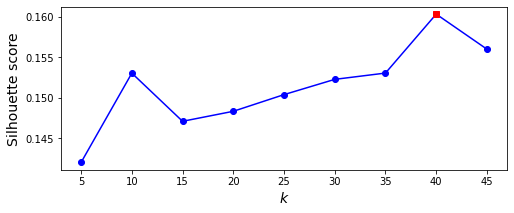

In [21]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X_train_pca, model.labels_)
                     for model in kmeans_per_k]
best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_score = silhouette_scores[best_index]
plt.figure(figsize=(8, 3))
plt.plot(k_range, silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.plot(best_k, best_score, "rs")
plt.show()

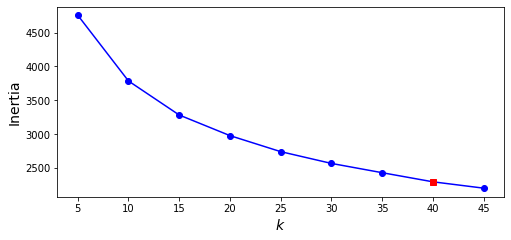

In [22]:
inertias = [model.inertia_ for model in kmeans_per_k]
best_inertia = inertias[best_index]

plt.figure(figsize=(8, 3.5))
plt.plot(k_range, inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.plot(best_k, best_inertia, "rs")
plt.show()

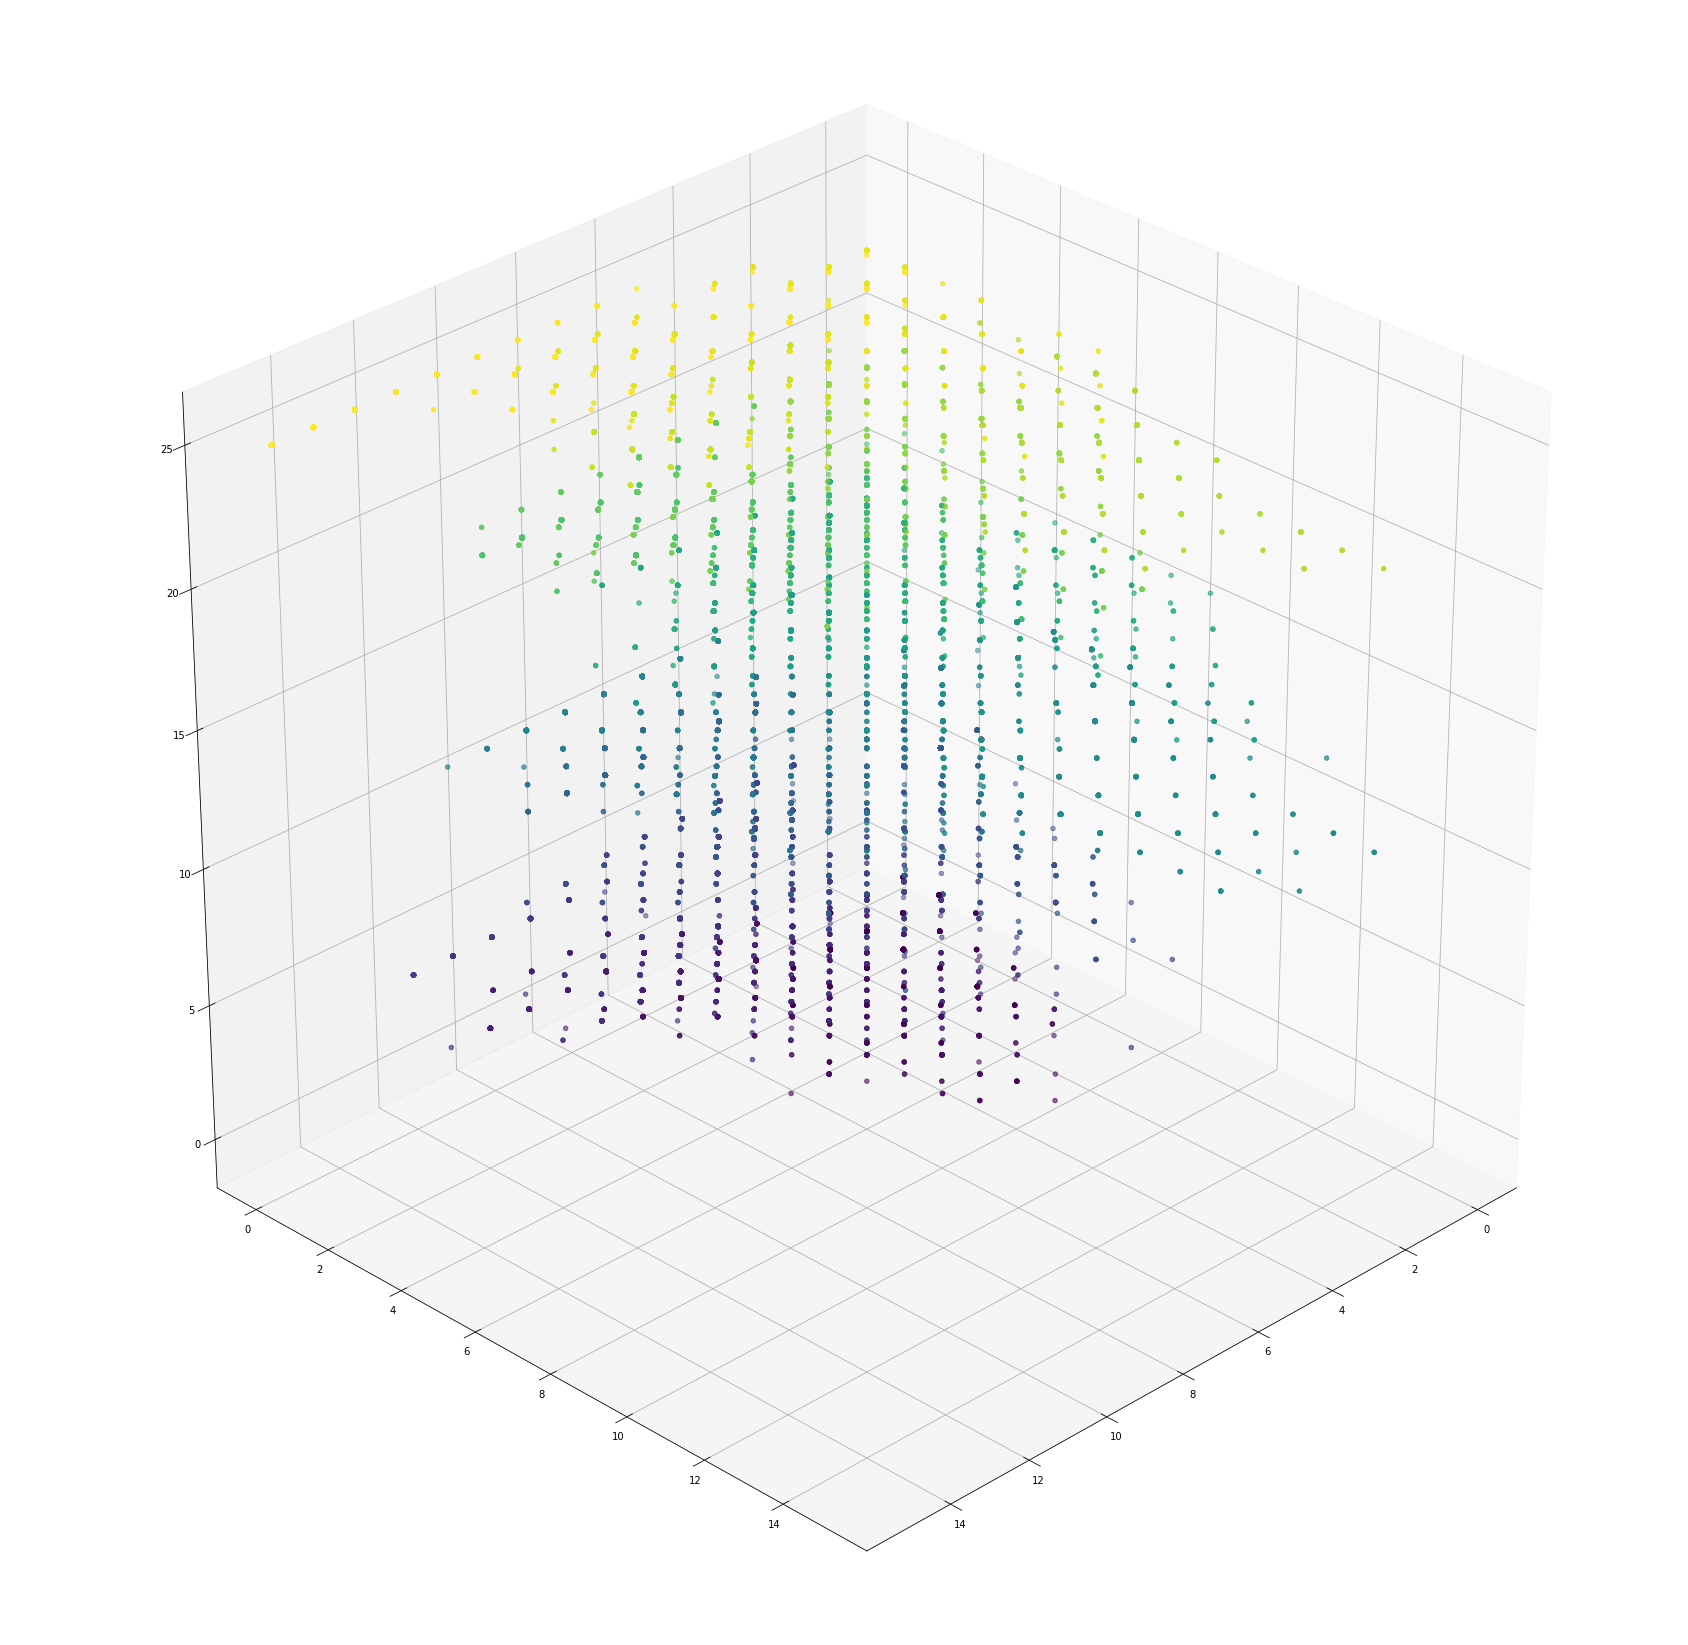

In [41]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(30,30))
ax = plt.axes(projection='3d')

# Set up data for three-dimensional scattered points; use the 26 labels for color map
#y2bar x-ege y-ege
ax.scatter3D(X['y2bar'], X['x-ege'], y, c=y)

# rotate the axes and update the view
ax.view_init(30, 45)
plt.draw()

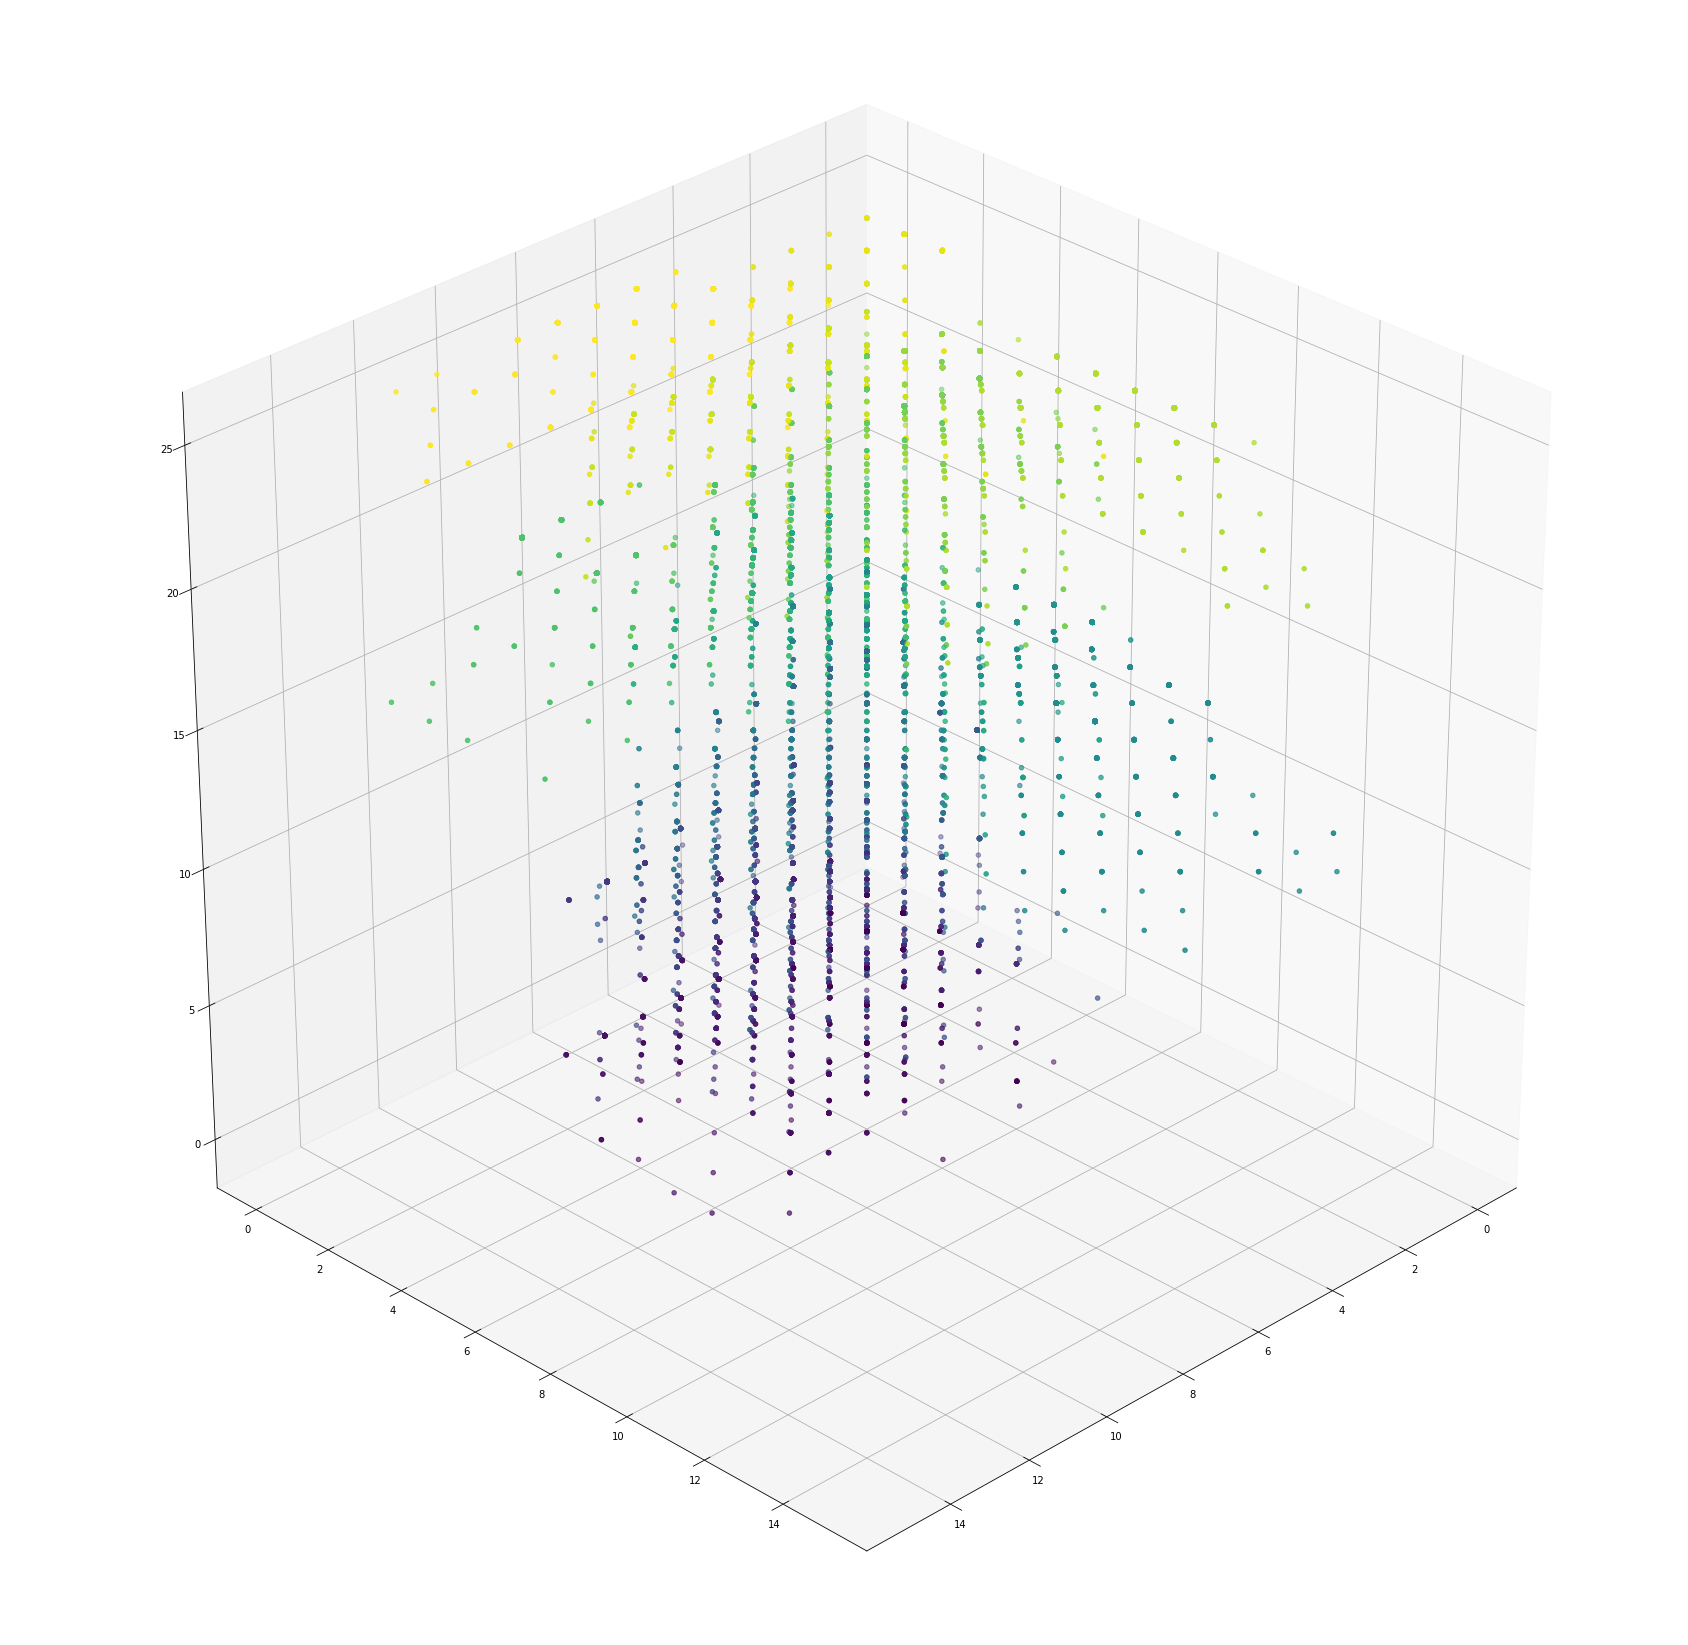

In [74]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(30,30))
ax = plt.axes(projection='3d')

# Set up data for three-dimensional scattered points; use the 26 labels for color map
#y2bar x-ege y-ege
ax.scatter3D(X['y-ege'], X['x-ege'], y, c=y)

# rotate the axes and update the view
ax.view_init(30, 45)
plt.draw()


# **Summery**

# Dataset

The objective of the ML model is to identify a large number of black-and-white rectangular pixel displays as one of the 26 capital letters in the English alphabet. 

Each letter was converted into 16 primitive numerical attributes (statistical moments and edge counts) which were then scaled to fit into a range of integer values from 0 through 15.

# Data Cleaning & Scaling


1.   Data doesn't have any null or missing value
2.   Data is scaled to fit into a range of integer values from 0 through 15, but if you want to keep the range low, you can scale the data using a standard scaler
3.   if you take a look at the 'Label Frequency' plot, it's clear that label frequencies for the letters A-Z are well-represented in the dataset.



# Training Summary

The classifiers we trained with 


1.   DecisionTree Classifier
2.   Bagging Classifier
3.   RandomForest Classifier
4.   Voting Classifier
5.   ExtraTrees Classifier
6.   SVC Classifier
7.   SGD Classifier


Random forest performed quite well with around 97% accuracy, followed by SVC. The decision tree didn't do well with the data


1.   SVC is 93.1 %
2.   DistionTree is 57.1 %
3.   Bagging is 87.6 %
4.   Random Forest is 96.3 %
5.   Extra Tree is 88.8 %
6.   SGD  is 68.9 %



K-fold cross-validation score for all models was slightly lower than the original score, but it was pretty close except for the Decision Tree

1.   SVC is 0.9194501046024807
2.   Decision Tree is 0.6492493332129072
3.   Bagging is 0.8678499168350914
4.   Random Forest is 0.958599917288864
5.   Extra Tree is 0.872649841855342
6.   SGD is 0.6735997133536662


# Voting classifier

The voting classifier performed quite well with the data, the soft voting score was slightly better than hard voting, cross-validation scores were close to the original score. 

initial score with soft voting was slightly lower than Random Forest but after removing SGD and Decision tree from voting, soft voting scores were matching Random forest

1.   Voting soft 0.9615
2.   voting hard 0.94675
3.   cross-validate voting soft 0.9515000247587381


# Plotting Feature Importance

The most important features of Random forest and decision  match on one feature, where the Decision tree has a totally different important feature


1.   Randomforest importent feature >> x-ege, y-ege
2.   Extra tree importent feature >>  x2bar, y2bar
3.   DT importent feature >> x-ege, x2ybr


# Kmeans
This particular dataset clearly shows, it is not quite performing well with Kmeans, 


Elbow and Silhouette methods are used to find the optimal number of clusters. Ambiguity arises for the elbow method to pick the value of k. Silhouette analysis can be used to study the separation distance between the resulting clusters and can be considered a better method compared to the Elbow method.

The Elbow plot is not showing any break in the slop
Silhouette score identify the clustering or best value for K is 40

# 3D plot most influential features 

3D plot for most important features from different tree models looks similar, the data seems to follow some pattern but scattered


 

In [23]:
###############################################
###############################################
